# Assignment 3, Vingron Part
by Paul Vogler (4979420), Robin Xu (), Yiftach Kolb (5195763)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (20 Points; SVD). 
### Use Python to generate a matrix with m columns and 10 rows, entries should be sampled from Gaussian distribution and made non-negative (by taking absolute value). Let m vary as follows: m ∈ {5, 6, 7, 8, 9, 10, 15, 20, 25, . . . , 300}. Calculate the (estimated) covariance matrix (remember to center your data before using this formula).

In [3]:
np.random.seed(42)
mu, sigma = 0, 1
m_list = list(range(5,301))
m_ranks = []
m_cov_matrices = []
for m in m_list:
    matrix = np.random.normal(mu, sigma, size=(10, m))
    matrix = abs(matrix)
    matrix_centered = matrix - matrix.mean()
    cov_matix = (matrix_centered.T @ matrix_centered) / 9
    m_ranks.append(np.linalg.matrix_rank(cov_matix))
    m_cov_matrices.append(cov_matix)

### (A) What is the rank of matrix S for different m? Create a scatterplot of the ranks in dependency on m and justify your result.

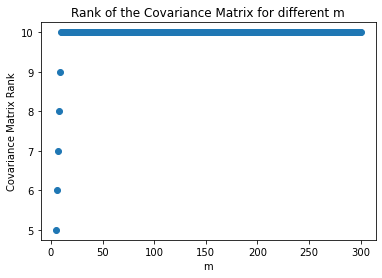

In [3]:
plt.scatter(m_list, m_ranks)
plt.xlabel("m")
plt.ylabel("Covariance Matrix Rank")
plt.title("Rank of the Covariance Matrix for different m")
plt.show()

#### Result:
The Rank of the Covariance Matrix is dependent on the m vs rowsize 10. For m <= 10 the rank is equal to m and equal to the matrix size. For m > 10 the rank can only be 10 at maximum, because of the 10 rows.

### (B) Calculate the Singular Value Decomposition (SVD) of the matrix S.

In [12]:
m_u, m_w, m_vt = [],[],[]
for cov_matix in m_cov_matrices:
    u, w, vt = np.linalg.svd(cov_matix)
    m_u.append(u)
    m_w.append(np.diag(w))
    m_vt.append(vt)

### (C) Compute the pseudoinverse S+ based on the SVD and the procedure explained in the slides. Do not use np.linalg.pinv or similar for this task.

In [13]:
# A+ = V*W^(-1)*U.T
m_S_plus = []
for u, w, vt in zip(m_u, m_w, m_vt):
    S_plus = vt.T @ np.linalg.inv(w) @ u.T
    m_S_plus.append(S_plus)

### (D) Calculate the product S · S+. By definition, this should be an identity matrix for nonsingular matrices.

In [14]:
m_identities = []
m_is_identity = []
for m, S_mat, S_plus in zip(m_list, m_cov_matrices, m_S_plus):
    identity = np.identity(m)
    is_indent = S_mat @ S_plus
    m_identities.append(is_indent)
    is_indent_rounded = np.around(is_indent, decimals=10)
    m_is_identity.append(np.all(np.equal(is_indent_rounded, identity)))
print("For the following m, The S*S+ product is the identity matrix (when rounding to 10 decimals):")
print(np.array(m_list)[np.where(m_is_identity)[0]])

For the following m, The S*S+ product is the identity matrix (when rounding to 10 decimals):
[ 5  6  7  8  9 10]


### (E) Calculate the Euclidean distance between S · S+ and the identity matrix of rank m: Im.

In [15]:
m_dists = []
for m, ident in zip(m_list , m_identities):
    identity = np.identity(m)
    m_dists.append(np.linalg.norm(ident-identity))

### (F) Plot this Euclidean distance versus m. Interpret your results.

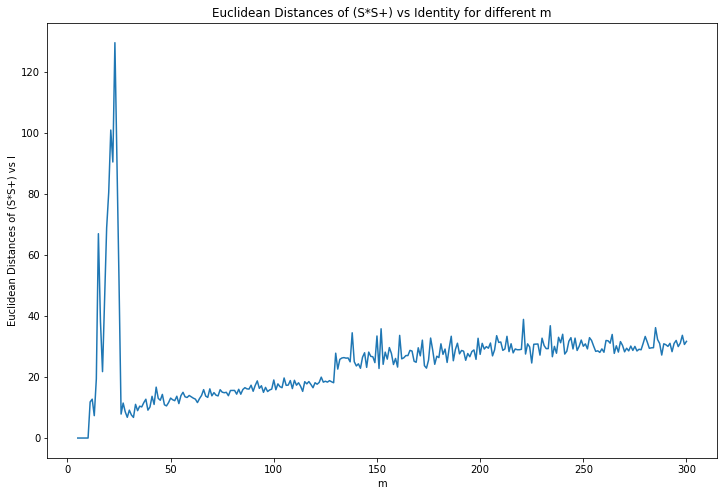

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(m_list, m_dists)
plt.xlabel("m")
plt.ylabel("Euclidean Distances of (S*S+) vs I")
plt.title("Euclidean Distances of (S*S+) vs Identity for different m")
plt.show()

#### Result:
The euclidean distances are 0 for small m (probably the non-singular ones up to 10. For the slightly singular matrices for m > 10, the distance seems to be the most unstable. Then for m > 30 the distance does stabilize but stays significantly unequal to 0 and is slightly increasing.